In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("insurance.csv")

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2.	Check the shape of the data along with the data types of the column

df.shape

In [30]:
# Check the shape of the data
print("Shape of the dataset:", df.shape)

# Check data types of each column
print("Data types of each column:\n", df.dtypes)


Shape of the dataset: (1338, 7)
Data types of each column:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Observation:
This will show the dimensions (rows and columns) of the dataset and the types of each column. This helps us understand the structure and features available.

## 3. Check missing values in the dataset and find the appropriate measures to fill in the missing values.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Observation:
Knowing the missing values helps determine if data cleaning is needed. Report the findings and the chosen imputation method if applicable.

In [35]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4.Explore the relationship between the feature and target column using a count plot of categorical columns and a scatter plot of numerical columns

In [36]:
df.duplicated().sum()

1

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.duplicated().sum()

0

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

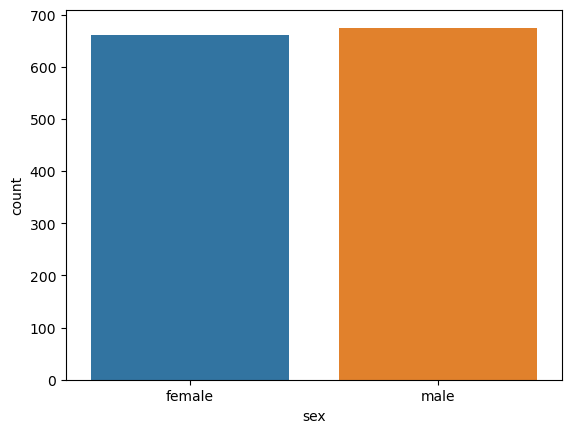

In [49]:
sns.countplot( x = "sex", data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

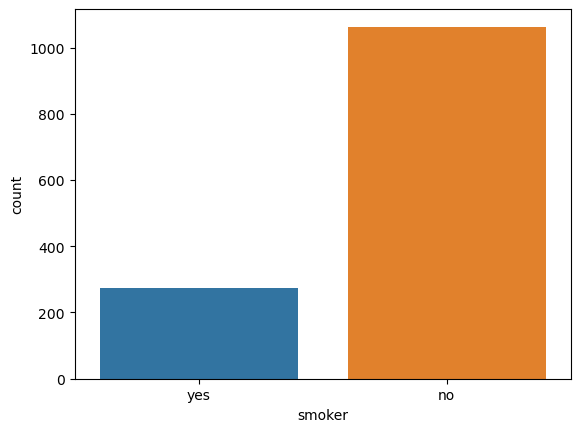

In [52]:
sns.countplot(x = 'smoker', data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

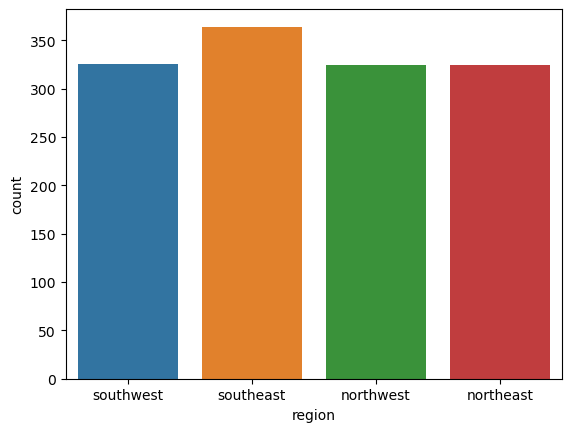

In [54]:
sns.countplot(x = 'region', data = df)
plt.show

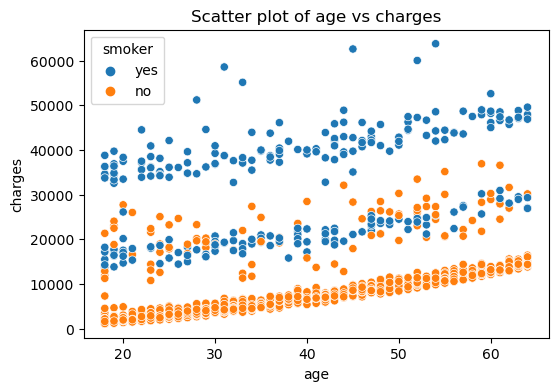

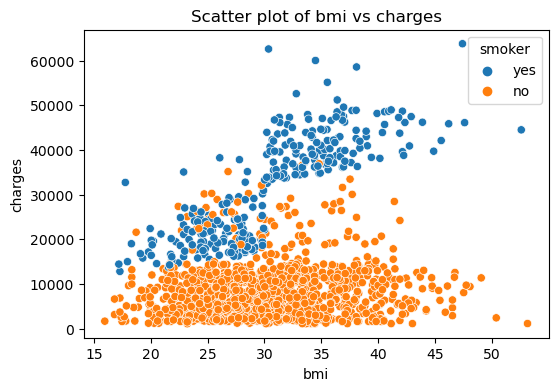

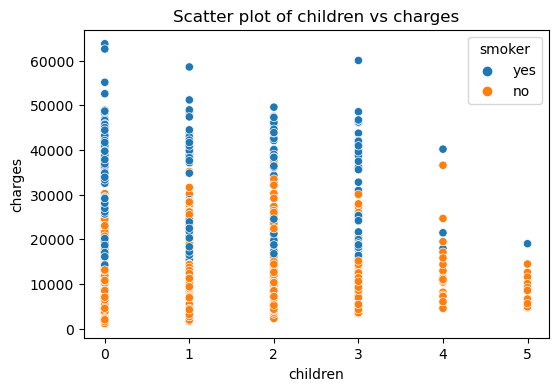

In [57]:
# Scatter plot for numerical columns against charges
numerical_cols = ['age', 'bmi', 'children']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data = df, x=col, y='charges', hue='smoker')
    plt.title(f'Scatter plot of {col} vs charges')
    plt.show()


## Observation:
Observe any patterns, such as whether charges tend to increase for certain values or categories. This is particularly insightful for variables like smoker or age.

## 5.Perform data visualization using plots of feature vs feature

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

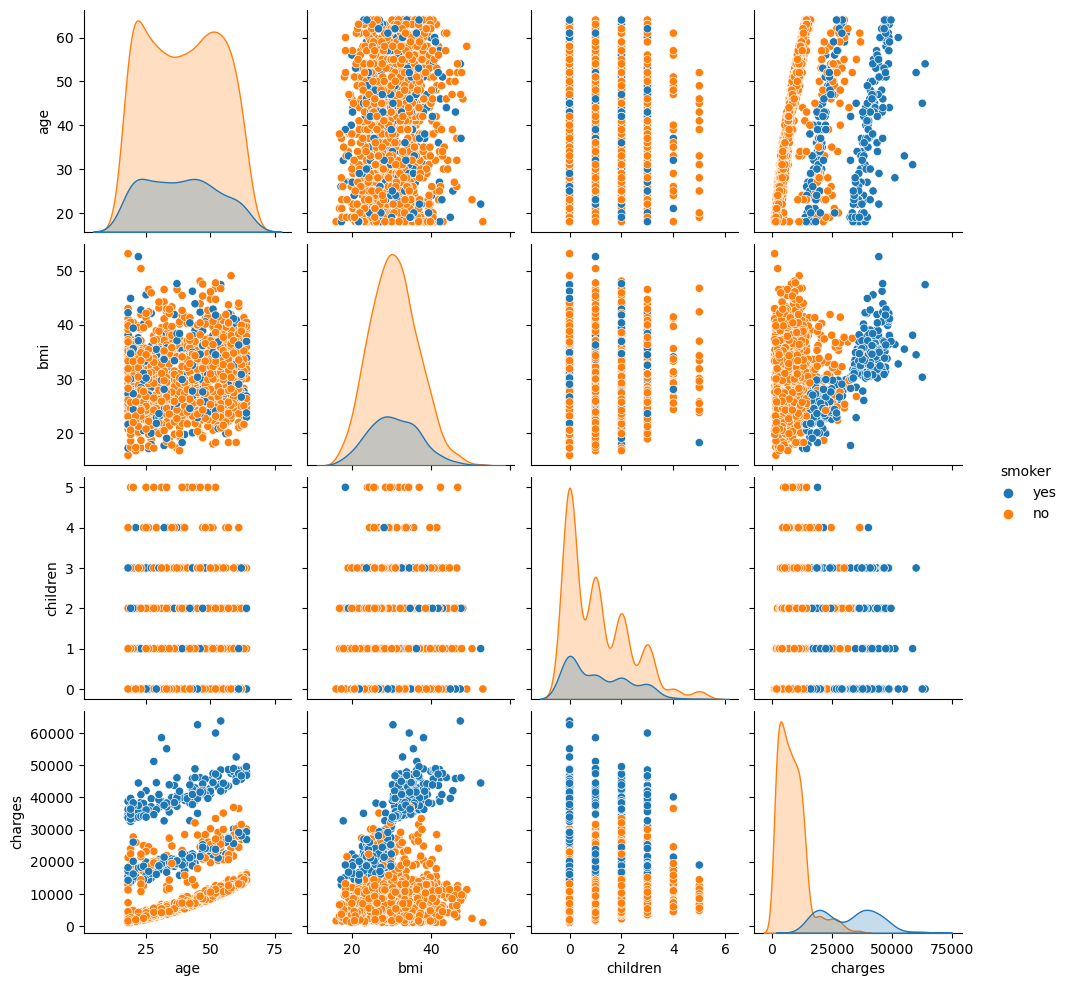

In [61]:
# Pair plot for numerical features to see relationships
sns.pairplot(data = df, hue="smoker")
plt.show()


## Observation:
Check if certain combinations of features (like age and BMI) relate to higher charges, especially for smokers.

##.6. Check if the number of premium charges for smokers or non-smokers is increasing as they are aging

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


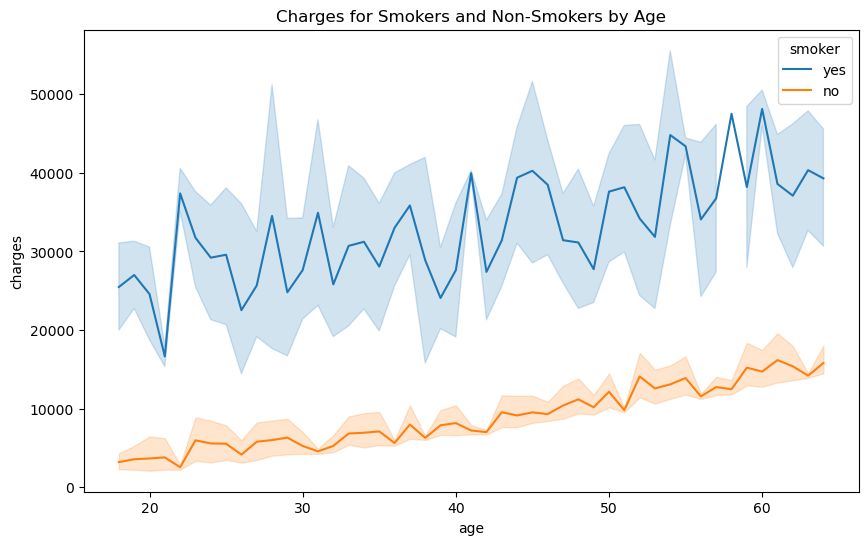

In [62]:
# Line plot to analyze the trend of charges with age for smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Charges for Smokers and Non-Smokers by Age")
plt.show()


'''Observation:

Look for trends showing that charges increase with age and see if this trend is more pronounced among smokers.

## Final Observations and Next Steps
Summarize patterns observed for each feature, such as correlations with the target variable (charges).
Identify influential features for a predictive model.
Prepare the dataset for model building, ensuring it’s clean and well-understood from the EDA findings.

## Following these steps will set up a solid foundation for building an insurance premium prediction model.'''